In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderNotFound
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from sklearn.cluster import KMeans

print("All libs imported")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# The code was removed by Watson Studio for sharing.

,gss_code,gss_name,year,population,births,deaths,int_in,int_out,int_net,dom_in,dom_out,dom_net,total_change
0,E09000001,City of London,2011,7412.758,79.0,34.0,899.943,483.185,416.758,886.322,853.880,32.442,494.201
1,E09000001,City of London,2012,6594.289,56.0,36.0,714.392,1516.861,-802.470,850.128,894.461,-44.333,-826.803
2,E09000001,City of London,2013,5957.695,71.0,27.0,624.000,1152.593,-528.593,627.999,821.000,-193.001,-677.594
3,E09000001,City of London,2014,6005.972,68.0,33.0,699.832,841.554,-141.723,906.001,768.000,138.001,31.278
4,E09000001,City of London,2015,6405.347,63.0,33.0,941.170,564.796,376.374,802.000,809.000,-7.000,399.375


In [4]:

#Remove birth,deaths,int_in,int-out,int-net,dom_in,dom-out,dom_net
df.drop(['births','deaths','int_in','int_out','int_net','dom_in','dom_out','dom_net','total_change','gss_code'], axis=1, inplace=True)
df.drop(df[df['gss_name'].isin(['London (total)'])].index,axis=0,inplace=True)
df.head()

,gss_name,year,population
0,City of London,2011,7412.758
1,City of London,2012,6594.289
2,City of London,2013,5957.695
3,City of London,2014,6005.972
4,City of London,2015,6405.347


In [5]:
df=df.pivot(index='gss_name', columns='year', values='population')
#Add a column for % increase in population growth from 2010-2050
df['growth']=round(((df[2050]-df[2011])/df[2011]),2)
df = df.reset_index().rename_axis(None, axis=1)
df.rename(columns={'gss_name':'Local Authority Districts',2011:'Y2011',2050:'Y2050'}, inplace=True)
df=df.groupby('Local Authority Districts').sum()
df.reset_index(inplace=True)
df.head()


,Local Authority Districts,Y2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,Y2050,growth
0,Barking and Dagenham,187415.955,189589.519,193447.573,197681.563,202259.334,207176.796,209693.270,214162.276,216794.558,219307.342,221726.276,224044.346,226243.376,228331.895,230354.558,232315.178,234219.246,236095.678,237942.691,239764.481,241562.485,243351.967,245140.580,246923.829,248682.312,250424.092,252155.715,253869.195,255561.784,257229.264,258867.016,260473.384,262041.494,263561.916,265034.064,266459.603,267839.947,269173.352,270460.752,271704.864,0.45
1,Barnet,357402.696,360689.839,364626.818,369138.857,373152.768,378486.577,380922.327,384572.132,389097.897,393424.762,397532.309,401418.254,405150.617,408745.448,412240.521,415658.323,418996.580,422300.359,425560.654,428778.985,431981.815,435193.723,438363.709,441481.664,444532.343,447524.228,450454.694,453349.342,456203.384,459018.954,461810.213,464571.763,467288.753,469946.511,472535.833,475056.317,477504.404,479875.563,482172.760,484394.901,0.36
2,Bexley,232606.401,232866.756,235310.833,238141.734,240386.293,242841.230,243720.462,243831.429,245704.176,247526.671,249354.629,251173.630,253002.586,254845.374,256683.229,258497.086,260268.873,262055.277,263833.642,265598.392,267384.214,269187.740,270997.437,272805.183,274616.929,276425.633,278210.140,279988.364,281766.163,283548.651,285331.565,287107.732,288868.173,290600.423,292296.547,293954.530,295570.479,297143.482,298672.055,300160.737,0.29
3,Brent,312148.998,315213.701,318447.696,321348.534,324465.876,325765.190,328332.603,330419.984,332279.843,334062.592,335802.676,337457.990,339039.870,340578.981,342099.175,343611.513,345143.599,346709.171,348309.417,349935.842,351598.801,353293.443,354987.152,356682.006,358358.290,360010.436,361647.964,363271.003,364872.536,366442.351,367985.755,369499.257,370975.399,372408.435,373795.464,375135.033,376432.866,377685.545,378896.983,380070.924,0.22
4,Bromley,310376.019,312025.087,315861.297,318667.811,321638.578,323348.960,324629.182,325315.125,328459.249,331471.083,334429.714,337261.737,340017.808,342748.142,345436.585,348087.098,350698.812,353286.746,355837.304,358357.322,360887.043,363434.458,365956.587,368447.956,370903.930,373339.985,375743.495,378148.752,380553.409,382970.351,385401.398,387839.667,390263.895,392651.403,394992.976,397282.018,399510.542,401672.557,403768.537,405795.775,0.31


In [6]:
years=['Local Authority Districts','Y2011','Y2050','growth']
df=df.loc[:,years]
df.head()

,Local Authority Districts,Y2011,Y2050,growth
0,Barking and Dagenham,187415.955,271704.864,0.45
1,Barnet,357402.696,484394.901,0.36
2,Bexley,232606.401,300160.737,0.29
3,Brent,312148.998,380070.924,0.22
4,Bromley,310376.019,405795.775,0.31


In [7]:
print("There are {} Local Authority Districts in the Greater London Area".format(len(df['Local Authority Districts'].unique())))

There are 33 Local Authority Districts in the Greater London Area


Local Authority Districts (gss_name) will be used for our analysis. All Local Authority Districts (excluding City of London) are London boroughs, governed by a London borough council.

In [8]:
#Get Latitude and Longitude for suburbs
address= df['Local Authority Districts'].apply(lambda x: x.split('-')[-1]+', London, United Kingdom').unique()
geolocater= Nominatim(user_agent="london-explorer")
location=[]
empty=[]

def getcoords(add):
    try:
        coords= geolocater.geocode(add, timeout=10)
        location.append([add, coords.latitude, coords.longitude])
        print("the coords are {}".format(location[-1]))
    
    except GeocoderTimedOut:
        return getcoords(add)
    
    except:
        empty.append([add])
        print("Couldn't find coords of {}".format(empty[-1]))
        
for add in address:
        getcoords(add)

the coords are ['Barking and Dagenham, London, United Kingdom', 51.5541171, 0.15050434261994267]
the coords are ['Barnet, London, United Kingdom', 51.65309, -0.2002261]
the coords are ['Bexley, London, United Kingdom', 51.4416793, 0.150488]
the coords are ['Brent, London, United Kingdom', 51.563825800000004, -0.2757596561855699]
the coords are ['Bromley, London, United Kingdom', 51.4028046, 0.0148142]
the coords are ['Camden, London, United Kingdom', 51.5423045, -0.1395604]
the coords are ['City of London, London, United Kingdom', 51.5156177, -0.0919983]
the coords are ['Croydon, London, United Kingdom', 51.3713049, -0.101957]
the coords are ['Ealing, London, United Kingdom', 51.5126553, -0.3051952]
the coords are ['Enfield, London, United Kingdom', 51.6520851, -0.0810175]
the coords are ['Greenwich, London, United Kingdom', 51.4820845, -0.0045417]
the coords are ['Hackney, London, United Kingdom', 51.5432402, -0.0493621]
the coords are ['Hammersmith and Fulham, London, United Kingdom'

In [9]:
len(location)

33

In [10]:
#Convert location list to Dataframe and save in a csv
df_loc= pd.DataFrame(location, columns=['Area','Latitude','Longitude'])
df_loc.to_csv('area_location.csv')
df_loc.head()

,Area,Latitude,Longitude
0,"Barking and Dagenham, London, United Kingdom",51.554117,0.150504
1,"Barnet, London, United Kingdom",51.653090,-0.200226
2,"Bexley, London, United Kingdom",51.441679,0.150488
3,"Brent, London, United Kingdom",51.563826,-0.275760
4,"Bromley, London, United Kingdom",51.402805,0.014814


In [11]:
trythis='London, United Kingdom'
#we will use this location as center of our map
geolocater= Nominatim(user_agent="dummy-exp")
center= geolocater.geocode(trythis)
lat= center.latitude
lon= center.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(trythis,lat, lon))

The geograpical coordinate of London, United Kingdom are 51.5073219, -0.1276474.


In [12]:
map_ldn=folium.Map(location=[lat,lon],zoom_start=10)
for lat, long, area in zip(df_loc['Latitude'], df_loc['Longitude'],df_loc['Area']):
    label=folium.Popup(area, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=1,
        popup=label,
        color='blue',
        fill=False,
        fill_color='blue',
        fill_opacity=1,
        parse_html=False).add_to(map_ldn)
    
map_ldn

# Methodology

Venues and categories

We will use Foursquare API to explore venue categories in each area. Venues can be categorized as residential, professional, shopping or leisure. Let's see what venue categories Foursquare identifies.

In [21]:
CLIENT_ID = 'T5S0BWDBEJHXCX0VKL44NF1MGREUEMDW2WEGAJFFTRVG2UPL' # your Foursquare ID
CLIENT_SECRET = 'A0PTGT1AJLEFGDQ5P1QYPNAD5NB4KTJWXLREPO0NLZBX2HOQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [22]:
#getting high level categories
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [23]:
len(results['response']['categories'])

10

There are 10 top level categories. There are multiple sub categories but they will not be explored

In [24]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


The explore option is used with categoryId to query the number of venues of each category in a specific radius. The response contains a totalResults value for the specified coordinates, radius and category.

In [25]:
def get_venues_count(lat,long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                long,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [26]:
#Create new dataframe to store venues data
df_venues = df_loc.copy()
for c in categories_list:
    df_venues[c[0]] = 0
    
df_venues


,Area,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,"Barking and Dagenham, London, United Kingdom",51.554117,0.150504,0,0,0,0,0,0,0,0,0,0
1,"Barnet, London, United Kingdom",51.653090,-0.200226,0,0,0,0,0,0,0,0,0,0
2,"Bexley, London, United Kingdom",51.441679,0.150488,0,0,0,0,0,0,0,0,0,0
3,"Brent, London, United Kingdom",51.563826,-0.275760,0,0,0,0,0,0,0,0,0,0
4,"Bromley, London, United Kingdom",51.402805,0.014814,0,0,0,0,0,0,0,0,0,0
5,"Camden, London, United Kingdom",51.542305,-0.139560,0,0,0,0,0,0,0,0,0,0
6,"City of London, London, United Kingdom",51.515618,-0.091998,0,0,0,0,0,0,0,0,0,0
7,"Croydon, London, United Kingdom",51.371305,-0.101957,0,0,0,0,0,0,0,0,0,0
8,"Ealing, London, United Kingdom",51.512655,-0.305195,0,0,0,0,0,0,0,0,0,0
9,"Enfield, London, United Kingdom",51.652085,-0.081018,0,0,0,0,0,0,0,0,0,0


In [28]:
#Request number of venues, store result as CSV
for i, row in df_venues.iterrows():
    for c in categories_list:        
        df_venues.loc[i, c[0]] = get_venues_count(df_venues.Latitude.iloc[i], df_venues.Longitude.iloc[i], radius=1000, categoryId=c[1])
    print(i)
    df_venues.to_csv('area_venues.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [29]:
df_venues.shape


(33, 13)

# Exploratory Data Analysis

Venues are analyzed through a box plot.

Normalize the data using MinMaxScaler (scale from 0 to 1). This scales the data and provides an easy to interpret score at the same time.

In [30]:

from sklearn.preprocessing import MinMaxScaler

X = df_venues.values[:,3:]
scaled_dataset = MinMaxScaler().fit_transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
df_scaled = pd.DataFrame(scaled_dataset)
df_scaled.columns = [c[0] for c in categories_list]
df_scaled.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.012821,0.057471,0.0,0.005319,0.015464,0.042017,0.011111,0.058824,0.084211,0.026087
1,0.025641,0.045977,0.0,0.053191,0.015464,0.016807,0.188889,0.058824,0.263158,0.034783
2,0.012821,0.011494,0.0,0.021277,0.025773,0.000000,0.011111,0.000000,0.010526,0.034783
3,0.051282,0.045977,0.0,0.186170,0.082474,0.042017,0.222222,0.235294,0.431579,0.130435
4,0.051282,0.022989,0.5,0.196809,0.051546,0.067227,0.311111,0.294118,0.663158,0.095652


Box plot of scaled data

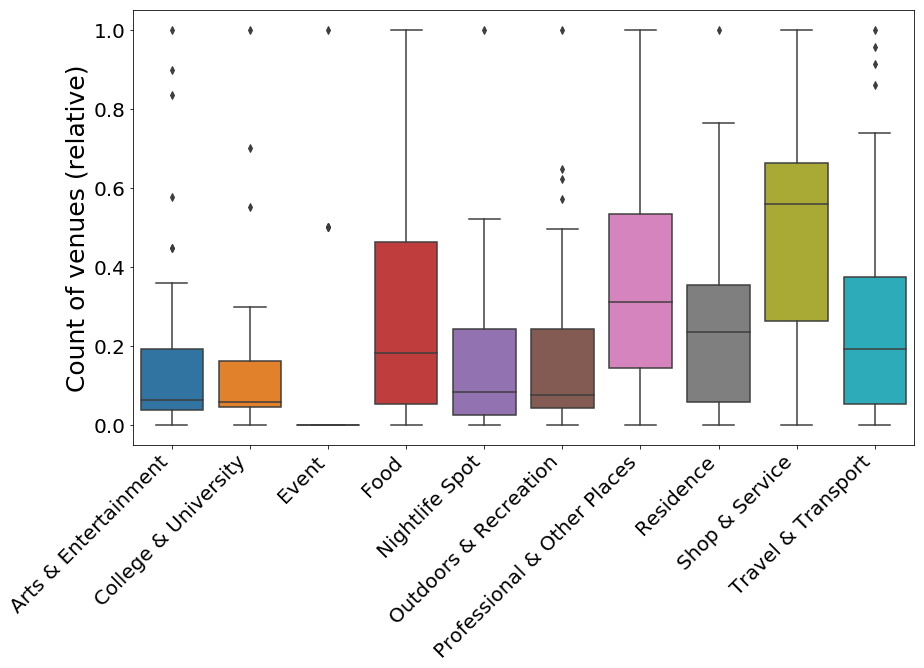

In [32]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(data = df_scaled)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

Some outliers for Art & Entertainment and Outdoors & Recreation. Not enough data for Event, so this category will be dropped.

In [33]:
df_venues.drop('Event', 1, inplace=True)
categories_list.remove(('Event', '4d4b7105d754a06373d81259'))

# Clustering

The following conclusions have been made for the different number of clusters:

•	2 clusters only show the uptown/downtown divide

•	3 clusters add clustering within the downtown

•	4 clusters add clustering within uptown and downtown

•	5 and more clusters are difficult to interpret


In [34]:

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_scaled)

kmeans_labels = kmeans.labels_

df_venues_clustered = df_venues.copy()
df_venues_clustered['Cluster'] = kmeans_labels

#dataframe to be used for box plot
df_scaled_clustered = df_scaled.copy()
df_scaled_clustered['Cluster'] = kmeans_labels

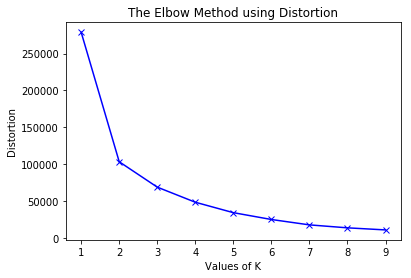

In [35]:
#Then we use the elbow method to see the optimal number of clusters
df_venues_clustering = df_venues.drop('Area', 1)
distortions=[] 
for i in range(1, 10): 
    KM = KMeans(n_clusters=i, max_iter = 100).fit(df_venues_clustering)
    
      
    # calculates squared error 
    # for the clustered points 
    distortions.append(KM.inertia_)      
  

plt.plot(range(1,10), distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


The Elbow method has confirmed that 4 clusters is the best fit for this project and we can visualize the clusters in the Box Plot below.


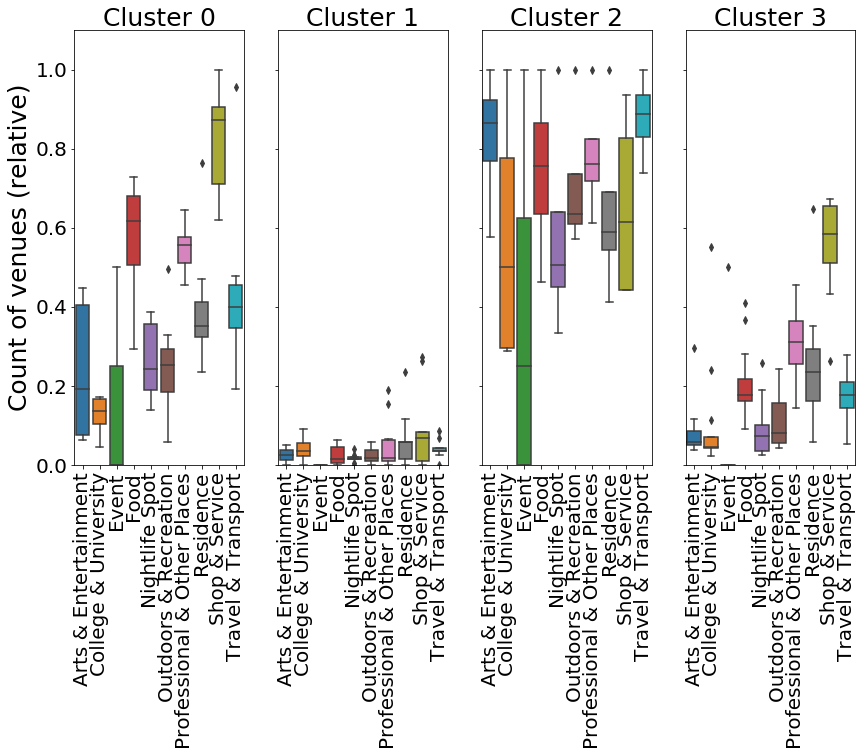

In [36]:
fig,axes= plt.subplots(1,kclusters,figsize=(14,8),sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(0, kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = df_scaled_clustered[df_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

Some interpretations of the clusters, based on the Box Plot above:

• Cluster 0 (blue) has moderate scores with shops and services being the most popular. These are developed residential suburbs

• Cluster 1 (green) has low frequencies for all venue categories. These appear to be underdeveloped neighborhoods

• Cluster 2 (red) has consistently high frequencies for all venue categories. This is the most diversely developed part of city

• Cluster 3 (magenta) has high frequencies but with less residential places and more professional places. These are the developed professional or industrial suburbs



In [37]:
map_ldn_gma = folium.Map(location=[lat,lon],zoom_start=11)

#add markers
for i, area, lat, long, cluster in zip(df_venues_clustered.index,
                                         df_venues_clustered['Area'],
                                         df_venues_clustered['Latitude'],
                                         df_venues_clustered['Longitude'],
                                         df_venues_clustered['Cluster']):   
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','red','magenta']
    folium.CircleMarker(
        [lat,long],
        fill=True,
        fill_opacity=1,
        popup=folium.Popup(area, parse_html=True),
        radius=5,
        color=colors[cluster]
    ).add_to(map_ldn_gma)
    
    
      
map_ldn_gma

In [38]:

#Rename Local Autority Districts to "Area" 
df.rename(columns={'Local Authority Districts':"Area"}, inplace=True)
df=df.groupby('Area').sum()
df.reset_index(inplace=True)

# Format area column. Will be useful for merging dataframes later
df['Area']=df['Area'].apply(lambda x: x.split('-')[-1]+', London, United Kingdom')


#Let's bring everything together
df_all= df_venues_clustered.merge(df, on='Area', how='left')
df_all.head(33)

,Area,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Y2011,Y2050,growth
0,"Barking and Dagenham, London, United Kingdom",51.554117,0.150504,1,5,5,4,7,4,1,11,3,1,187415.955,271704.864,0.45
1,"Barnet, London, United Kingdom",51.653090,-0.200226,2,4,14,4,4,20,1,28,4,1,357402.696,484394.901,0.36
2,"Bexley, London, United Kingdom",51.441679,0.150488,1,1,8,6,2,4,0,4,4,1,232606.401,300160.737,0.29
3,"Brent, London, United Kingdom",51.563826,-0.275760,4,4,39,17,7,23,4,44,15,3,312148.998,380070.924,0.22
4,"Bromley, London, United Kingdom",51.402805,0.014814,4,2,41,11,10,31,5,66,11,3,310376.019,405795.775,0.31
5,"Camden, London, United Kingdom",51.542305,-0.139560,35,12,125,73,32,54,6,90,50,0,220069.114,298659.502,0.36
6,"City of London, London, United Kingdom",51.515618,-0.091998,45,61,192,195,121,71,17,78,85,2,7412.758,9749.457,0.32
7,"Croydon, London, United Kingdom",51.371305,-0.101957,6,4,59,28,9,51,6,86,37,0,364660.017,455556.128,0.25
8,"Ealing, London, United Kingdom",51.512655,-0.305195,6,10,73,23,11,44,5,67,30,3,339245.037,407355.920,0.20
9,"Enfield, London, United Kingdom",51.652085,-0.081018,3,5,24,8,7,16,1,58,6,3,313792.563,408988.824,0.30


In [39]:
#get districts with at least 33% population expansion
df_dev_areas=df_all.drop(df_all[df_all['growth']<0.33].index,axis=0)
df_dev_areas.drop(df_dev_areas[df_dev_areas['Y2050']<300000].index,axis=0,inplace=True)
df_dev_areas

,Area,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster,Y2011,Y2050,growth
1,"Barnet, London, United Kingdom",51.653090,-0.200226,2,4,14,4,4,20,1,28,4,1,357402.696,484394.901,0.36
11,"Hackney, London, United Kingdom",51.543240,-0.049362,9,3,81,51,25,43,3,56,24,3,247139.366,327894.852,0.33
15,"Havering, London, United Kingdom",51.544369,-0.144303,35,6,120,67,31,44,4,88,43,0,237823.833,331651.129,0.39
16,"Hillingdon, London, United Kingdom",51.542519,-0.448335,2,4,4,1,4,9,2,4,0,1,275369.718,366226.430,0.33
22,"Lewisham, London, United Kingdom",51.462432,-0.010133,5,4,21,7,12,27,11,59,17,3,276913.499,371326.812,0.34
25,"Redbridge, London, United Kingdom",51.576320,0.045410,0,0,6,4,5,3,1,3,5,1,281252.278,390383.916,0.39
29,"Tower Hamlets, London, United Kingdom",51.525629,-0.033585,9,48,30,17,20,35,5,28,25,3,255991.567,375148.569,0.47


In [40]:
map_dev_clusters=folium.Map(location=[lat,lon],zoom_start=11)

#add markers
for area, lat, long, cluster in zip(df_venues_clustered['Area'],
                                    df_venues_clustered['Latitude'],
                                    df_venues_clustered['Longitude'],
                                    df_venues_clustered['Cluster']):   
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','red','magenta']
    folium.CircleMarker(
        [lat,long],
        fill=True,
        fill_opacity=1,
        radius=5,
        color=colors[cluster]
    ).add_to(map_dev_clusters)
    
for lat, long, area, rad in zip(df_dev_areas['Latitude'], 
                                df_dev_areas['Longitude'],
                                df_dev_areas['Area'],
                                df_dev_areas['growth']):
    label=folium.Popup('{}, {}%'.format(area,rad*100), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=50+rad*5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.3,
        weight=1.5,
        parse_html=False).add_to(map_dev_clusters)
    
map_dev_clusters

In [41]:
map_dev_clusters.save('dev_districs_london.html')

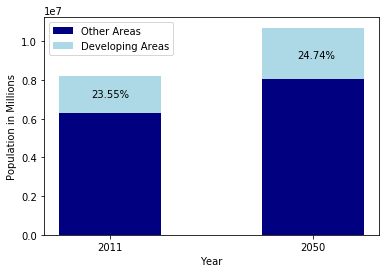

The developing clusters that host 23.55% of city's population in 2011 will grow to host 24.74% of total population in 2050


In [42]:
total_population_2011 = df['Y2011'].sum()
total_population_2050 = df['Y2050'].sum()
cluster_population_2011=df_dev_areas['Y2011'].sum()
cluster_population_2050=df_dev_areas['Y2050'].sum()

bar1=[(total_population_2011-cluster_population_2011),(total_population_2050-cluster_population_2050)]
bar2=[cluster_population_2011,cluster_population_2050]
r=[0,2]
names=['2011','2050']
width=1


plt.bar(r, bar1, color='navy', width=width)
plt.bar(r, bar2, bottom=bar1, color='lightblue', width=width)
plt.xticks(r, names)



plt.xlabel("Year")
plt.ylabel("Population in Millions")
plt.legend(['Other Areas','Developing Areas']) 

percin2011= round((cluster_population_2011/total_population_2011)*100,2)
percin2050= round((cluster_population_2050/total_population_2050)*100,2)

plt.annotate('23.55%', # text to display
             xy=(0.0000000000000000000000000001, 7000000),                    # start the text at at point (year 2008 , pop 30)
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='center',  ) 

plt.annotate('24.74%', # text to display
             xy=(1.85, 9000000),                    # start the text at at point (year 2008 , pop 30)
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left')   

plt.show()

percin2011= round((cluster_population_2011/total_population_2011)*100,2)
percin2050= round((cluster_population_2050/total_population_2050)*100,2)
print('The developing clusters that host {}% of city\'s population in 2011 will grow to host {}% of total population in 2050'.format(percin2011,percin2050))
